# Coding Exercise #3 *Laser amplifier with saturation*

In this exercise, you will simulate the growth of the intensity of a laser beam propagating through a laser amplifier in the presence of gain saturation.

In the lectures, we saw that a laser beam passing through a pumped amplifying medium (amplifier) does not experience unbounded exponential growth.

As the beam becomes more intense, it decreases the population inversion through stimulated emission and the hence the gain is reduced.

The fact that the gain experienced by the beam depends on the beam intensity and the intensity depends on the gain, we end up with the following nonlinear differential equation


## $\frac{dI\left(z\right)}{dz}=\gamma\left(I\left(z\right)\right)I\left(z\right)$

Here, the beam is propagating in the $z$ direction and $I\left(z\right)$, $\gamma\left(z\right)$ are the beam intensity and exponential gain coefficient at position $z$, respectively.

This differential equation cannot be solved analytically in the general case.


## A note about units

Provided we are consistent, it doesn't matter which units we use for intensity. To keep things general, we will use arbitray units.

## Simulation Tasks


**a)** A laser amplifier of length $L=10$ cm has a small signal gain coefficient of $\gamma_0 = 1$ /cm (at a certain level of pumping) and a saturation intensity $I_{sat}=100$ (arb. units) 

A beam of $I_{in}=1$ is applied to the input of the amplifier. 

Use `odeint` from `scipy.integrate` to solve the differential equation above.

i) Using a log vertical scale, plot $I(z)$ and the $I_{unsat}(z)$ as a function of $z$ in the amplifier, where $I_{unsat}(z) = I_{in}\exp(\gamma_0 z)$ represents the intensity growth of the beam in the absence of saturation.

 

ii) Plot $\gamma$ and $\gamma_0$ as a function of z in the amplifier.

ii) Calculate the intensity at the output of the amplifier $I_{out}$; and the saturated, $G$,  and unsaturated gain, $G_0$.

iii) Check your answer for $I_{out}$ using the appropriate formula from Lecture 4.6.1

[[  1.        ]
 [  1.00009902]
 [  1.00019804]
 ...
 [401.46736175]
 [401.4753677 ]
 [401.48337368]]
[  1.           1.00009902   1.00019804 ... 401.46736175 401.4753677
 401.48337368]


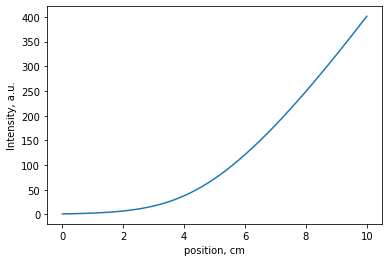

In [2]:
#solve differential equation
L=10 #cm
gamma_0=1 #/cm
I_sat = 100
I_in=1
def gamma(I,gamma_0,I_sat):
    return gamma_0/(1+I/I_sat)

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
def dydx(y,x,gamma_0,I_sat):
    I=y[0]
    return [gamma(I,gamma_0,I_sat)*I]

y0=[I_in]

x=np.linspace(0,L,100000)
y=odeint(dydx,y0,x,args=(gamma_0,I_sat))
print(y)
I=y.T[0]
print(I)
plt.plot(x,I)
plt.xlabel("position, cm")
plt.ylabel("Intensity, a.u.")
plt.show()
    

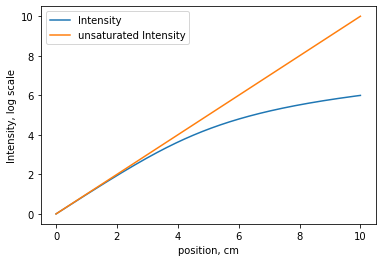

In [3]:
logI=np.log(I)
def I_unsat(z):
    return I_in*np.exp(gamma_0*z)
logI_unsat=np.log(I_unsat(x))
plt.plot(x,logI, label="Intensity")
plt.plot(x,logI_unsat, label="unsaturated Intensity")
plt.xlabel("position, cm")
plt.ylabel("Intensity, log scale")
plt.legend()
plt.show()

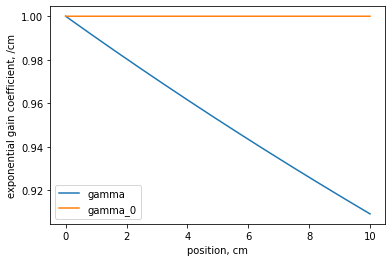

In [4]:
plt.plot(x,gamma(x,gamma_0,I_sat),label="gamma")
gamma_0_array=gamma_0*np.ones(len(x))
plt.plot(x,gamma_0_array, label="gamma_0")
plt.xlabel("position, cm")
plt.ylabel("exponential gain coefficient, /cm")
plt.legend()
plt.show()

In [5]:
#x goes up to L, so need the last value
i=-1
I_out=I[i]
G=I_out/I_in
G_0=np.exp(gamma_0*L)
print(I_out,G,G_0)

401.483373676529 401.483373676529 22026.465794806718


In [6]:
I_out2=I_sat*(G/(G-1))*np.log(G_0/G)
print(I_out2)#good agreement

401.48338783424884


### Extension

**b)** How does the output intensity vary with input intensity over a large range of input intensties (from $I_{in}\ll I_{sat}$ to $I_{in}\gg I_{sat}$)? Think carefully about the behaviour at the extremes. Plot a sketch by hand to record your predictions.

**c)** Now carry out a simulation to test your prediction. Make a log-log plot of $I_{out}$ vs $I_{in}$ for $I_{in}$ in the range 1e-3 to 1e-5 (use `np.logspace`) for $\gamma_0=0.5$ /cm and $I_{sat}=100$. On the same axes, plot the extreme cases you thought about in the previous part. Were your predictions correct? If not, use the simulations to improve your understanding.

C:\Users\ML\AppData\Local\Temp/ipykernel_23596/3668666206.py:9: RuntimeWarning: overflow encountered in double_scalars
  y0=[10**i]
C:\Users\ML\AppData\Local\Temp/ipykernel_23596/84792196.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return [gamma(I,gamma_0,I_sat)*I]


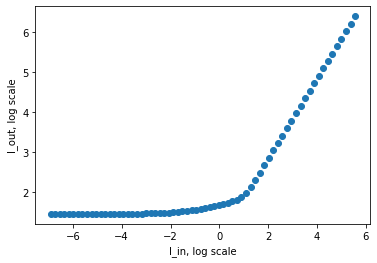

In [7]:
I_in= np.logspace(-3,5,100)
gamma_0=0.5#/cm
I_sat=100
G_0=np.exp(gamma_0*L)
I_out=[]

for i in I_in:
    #find I_out for each I_in by solving the ODE again?
    y0=[10**i]
    y=odeint(dydx,y0,x,args=(gamma_0,I_sat))
    I=y.T[0]
    I_out.append(np.log(I[-1]))
    
logI_out=np.log(np.array(I_out))
logI_in=np.log(I_in)
plt.scatter(logI_in,logI_out)
plt.xlabel("I_in, log scale")
plt.ylabel("I_out, log scale")
plt.show()